<a href="https://colab.research.google.com/github/Nikil-D-Gr8/UCIHeartdisease/blob/main/UCIHeart.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Loading and setting up the Data

In [1]:
import numpy as np
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/heart.csv")

# Display the first few rows to verify the data
df.head()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Normalize the Data

In [2]:
# Normalize the data
for i in df.columns:
    for each in df[i].values:
        if each > 1 or each < -1:
            df[i] = (df[i] - np.min(df[i])) / (np.max(df[i]) - np.min(df[i]))
        else:
            pass

# Check the normalized data
df.describe()


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,0.528465,0.683168,0.322332,0.354941,0.274575,0.148515,0.264026,0.600358,0.326733,0.167678,0.699670,0.182343,0.771177,0.544554
std,0.189210,0.466011,0.344017,0.165454,0.118335,0.356198,0.262930,0.174849,0.469794,0.187270,0.308113,0.255652,0.204092,0.498835
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.385417,0.000000,0.000000,0.245283,0.194064,0.000000,0.000000,0.477099,0.000000,0.000000,0.500000,0.000000,0.666667,0.000000
50%,0.541667,1.000000,0.333333,0.339623,0.260274,0.000000,0.500000,0.625954,0.000000,0.129032,0.500000,0.000000,0.666667,1.000000
75%,0.666667,1.000000,0.666667,0.433962,0.339041,0.000000,0.500000,0.725191,1.000000,0.258065,1.000000,0.250000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Target and Feature Seperation

In [3]:
# Separate the target variable from the features
y = df["target"]
X = df.drop(["target"], axis=1)

# Display the shapes of X and y to confirm
print("Features shape (X):", X.shape)
print("Target shape (y):", y.shape)


Features shape (X): (303, 13)
Target shape (y): (303,)


#Logistic Regression

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define the logistic regression model and the parameter grid for GridSearchCV
log_reg = LogisticRegression(solver='liblinear')
param_grid = {
    'C': [0.1, 1, 10, 100],
    'penalty': ['l1', 'l2']
}

# Step 2: Perform GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=0)
grid_search.fit(X, y)

# Step 3: Get the best model
best_log_reg = grid_search.best_estimator_

# Step 4: Make predictions
y_pred = best_log_reg.predict(X)
y_prob = best_log_reg.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy = grid_search.best_score_
precision = precision_score(y, y_pred)
recall = recall_score(y, y_pred)
f1 = f1_score(y, y_pred)
roc_auc = roc_auc_score(y, y_prob)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1 Score: {f1:.4f}")
print(f"ROC AUC: {roc_auc:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred))

# Save the best model in a variable
best_logistic_regression_model = best_log_reg


Best Parameters: {'C': 10, 'penalty': 'l2'}
Accuracy: 0.8316
Precision: 0.8172
Recall: 0.9212
F1 Score: 0.8661
ROC AUC: 0.9246

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.82       138
           1       0.82      0.92      0.87       165

    accuracy                           0.84       303
   macro avg       0.85      0.84      0.84       303
weighted avg       0.85      0.84      0.84       303


Confusion Matrix:
 [[104  34]
 [ 13 152]]


#K nearest neighbor

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Step 1: Define the KNN model and the parameter grid for GridSearchCV
knn = KNeighborsClassifier()
param_grid_knn = {
    'n_neighbors': [3, 5, 7, 9],
    'weights': ['uniform', 'distance'],
    'p': [1, 2]  # 1 is for Manhattan distance, 2 is for Euclidean distance
}

# Step 2: Perform GridSearchCV
grid_search_knn = GridSearchCV(knn, param_grid_knn, cv=5, scoring='accuracy', verbose=0)
grid_search_knn.fit(X, y)

# Step 3: Get the best model
best_knn = grid_search_knn.best_estimator_

# Step 4: Make predictions
y_pred_knn = best_knn.predict(X)
y_prob_knn = best_knn.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_knn = grid_search_knn.best_score_
precision_knn = precision_score(y, y_pred_knn)
recall_knn = recall_score(y, y_pred_knn)
f1_knn = f1_score(y, y_pred_knn)
roc_auc_knn = roc_auc_score(y, y_prob_knn)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_knn.best_params_}")
print(f"Accuracy: {accuracy_knn:.4f}")
print(f"Precision: {precision_knn:.4f}")
print(f"Recall: {recall_knn:.4f}")
print(f"F1 Score: {f1_knn:.4f}")
print(f"ROC AUC: {roc_auc_knn:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_knn))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_knn))

# Save the best model in a variable
best_knn_model = best_knn


Best Parameters: {'n_neighbors': 5, 'p': 1, 'weights': 'uniform'}
Accuracy: 0.8283
Precision: 0.8929
Recall: 0.9091
F1 Score: 0.9009
ROC AUC: 0.9531

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.87      0.88       138
           1       0.89      0.91      0.90       165

    accuracy                           0.89       303
   macro avg       0.89      0.89      0.89       303
weighted avg       0.89      0.89      0.89       303


Confusion Matrix:
 [[120  18]
 [ 15 150]]


#SVM

In [8]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, confusion_matrix

# Step 1: Define the SVM model and the parameter grid for GridSearchCV
svm = SVC(probability=True)  # probability=True is required to compute ROC AUC
param_grid_svm = {
    'C': [0.1, 1, 10, 100],
    'kernel': ['linear', 'rbf', 'poly'],
    'degree': [3, 4, 5]  # Only relevant for 'poly' kernel
}

# Step 2: Perform GridSearchCV
grid_search_svm = GridSearchCV(svm, param_grid_svm, cv=5, scoring='accuracy', verbose=0)
grid_search_svm.fit(X, y)

# Step 3: Get the best model
best_svm = grid_search_svm.best_estimator_

# Step 4: Make predictions
y_pred_svm = best_svm.predict(X)
y_prob_svm = best_svm.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_svm = grid_search_svm.best_score_
precision_svm = precision_score(y, y_pred_svm)
recall_svm = recall_score(y, y_pred_svm)
f1_svm = f1_score(y, y_pred_svm)
roc_auc_svm = roc_auc_score(y, y_prob_svm)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_svm.best_params_}")
print(f"Accuracy: {accuracy_svm:.4f}")
print(f"Precision: {precision_svm:.4f}")
print(f"Recall: {recall_svm:.4f}")
print(f"F1 Score: {f1_svm:.4f}")
print(f"ROC AUC: {roc_auc_svm:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_svm))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_svm))

# Save the best model in a variable
best_svm_model = best_svm


Best Parameters: {'C': 1, 'degree': 3, 'kernel': 'poly'}
Accuracy: 0.8546
Precision: 0.8920
Recall: 0.9515
F1 Score: 0.9208
ROC AUC: 0.9686

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.86      0.90       138
           1       0.89      0.95      0.92       165

    accuracy                           0.91       303
   macro avg       0.91      0.91      0.91       303
weighted avg       0.91      0.91      0.91       303


Confusion Matrix:
 [[119  19]
 [  8 157]]


#Decision Tree

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 1: Define the Decision Tree model and the parameter grid for GridSearchCV
decision_tree = DecisionTreeClassifier()
param_grid_tree = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Step 2: Perform GridSearchCV
grid_search_tree = GridSearchCV(decision_tree, param_grid_tree, cv=5, scoring='accuracy', verbose=0)
grid_search_tree.fit(X, y)

# Step 3: Get the best model
best_tree = grid_search_tree.best_estimator_

# Step 4: Make predictions
y_pred_tree = best_tree.predict(X)
y_prob_tree = best_tree.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_tree = grid_search_tree.best_score_
precision_tree = precision_score(y, y_pred_tree)
recall_tree = recall_score(y, y_pred_tree)
f1_tree = f1_score(y, y_pred_tree)
roc_auc_tree = roc_auc_score(y, y_prob_tree)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_tree.best_params_}")
print(f"Accuracy: {accuracy_tree:.4f}")
print(f"Precision: {precision_tree:.4f}")
print(f"Recall: {recall_tree:.4f}")
print(f"F1 Score: {f1_tree:.4f}")
print(f"ROC AUC: {roc_auc_tree:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_tree))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_tree))

# Save the best model in a variable
best_tree_model = best_tree


Best Parameters: {'criterion': 'gini', 'max_depth': None, 'min_samples_leaf': 2, 'min_samples_split': 5}
Accuracy: 0.7855
Precision: 1.0000
Recall: 0.9212
F1 Score: 0.9590
ROC AUC: 0.9963

Classification Report:
               precision    recall  f1-score   support

           0       0.91      1.00      0.96       138
           1       1.00      0.92      0.96       165

    accuracy                           0.96       303
   macro avg       0.96      0.96      0.96       303
weighted avg       0.96      0.96      0.96       303


Confusion Matrix:
 [[138   0]
 [ 13 152]]


#Random Forest

In [10]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix

# Step 1: Define the Random Forest model and the parameter grid for GridSearchCV
random_forest = RandomForestClassifier()
param_grid_forest = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [None, 10, 20, 30, 40],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

# Step 2: Perform GridSearchCV
grid_search_forest = GridSearchCV(random_forest, param_grid_forest, cv=5, scoring='accuracy', verbose=0)
grid_search_forest.fit(X, y)

# Step 3: Get the best model
best_forest = grid_search_forest.best_estimator_

# Step 4: Make predictions
y_pred_forest = best_forest.predict(X)
y_prob_forest = best_forest.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_forest = grid_search_forest.best_score_
precision_forest = precision_score(y, y_pred_forest)
recall_forest = recall_score(y, y_pred_forest)
f1_forest = f1_score(y, y_pred_forest)
roc_auc_forest = roc_auc_score(y, y_prob_forest)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_forest.best_params_}")
print(f"Accuracy: {accuracy_forest:.4f}")
print(f"Precision: {precision_forest:.4f}")
print(f"Recall: {recall_forest:.4f}")
print(f"F1 Score: {f1_forest:.4f}")
print(f"ROC AUC: {roc_auc_forest:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_forest))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_forest))

# Save the best model in a variable
best_forest_model = best_forest


Best Parameters: {'bootstrap': True, 'max_depth': 40, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}
Accuracy: 0.8546
Precision: 0.9029
Recall: 0.9576
F1 Score: 0.9294
ROC AUC: 0.9841

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.88      0.91       138
           1       0.90      0.96      0.93       165

    accuracy                           0.92       303
   macro avg       0.92      0.92      0.92       303
weighted avg       0.92      0.92      0.92       303


Confusion Matrix:
 [[121  17]
 [  7 158]]


#Gradient Boosting Machines (GBM)

In [11]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define the Gradient Boosting model and the parameter grid for GridSearchCV
gbm = GradientBoostingClassifier()
param_grid_gbm = {
    'n_estimators': [50, 100, 150, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 4, 5, 6],
    'subsample': [0.8, 0.9, 1.0]
}

# Step 2: Perform GridSearchCV
grid_search_gbm = GridSearchCV(gbm, param_grid_gbm, cv=5, scoring='accuracy', verbose=0)
grid_search_gbm.fit(X, y)

# Step 3: Get the best model
best_gbm = grid_search_gbm.best_estimator_

# Step 4: Make predictions
y_pred_gbm = best_gbm.predict(X)
y_prob_gbm = best_gbm.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_gbm = grid_search_gbm.best_score_
precision_gbm = precision_score(y, y_pred_gbm)
recall_gbm = recall_score(y, y_pred_gbm)
f1_gbm = f1_score(y, y_pred_gbm)
roc_auc_gbm = roc_auc_score(y, y_prob_gbm)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_gbm.best_params_}")
print(f"Accuracy: {accuracy_gbm:.4f}")
print(f"Precision: {precision_gbm:.4f}")
print(f"Recall: {recall_gbm:.4f}")
print(f"F1 Score: {f1_gbm:.4f}")
print(f"ROC AUC: {roc_auc_gbm:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_gbm))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_gbm))

# Save the best model in a variable
best_gbm_model = best_gbm


Best Parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 50, 'subsample': 0.8}
Accuracy: 0.8314
Precision: 0.9880
Recall: 1.0000
F1 Score: 0.9940
ROC AUC: 0.9992

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       138
           1       0.99      1.00      0.99       165

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303


Confusion Matrix:
 [[136   2]
 [  0 165]]


#AdaBoost

In [12]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define the AdaBoost model and the parameter grid for GridSearchCV
adaboost = AdaBoostClassifier()
param_grid_adaboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 1.0],
    'algorithm': ['SAMME', 'SAMME.R']
}

# Step 2: Perform GridSearchCV
grid_search_adaboost = GridSearchCV(adaboost, param_grid_adaboost, cv=5, scoring='accuracy', verbose=0)
grid_search_adaboost.fit(X, y)

# Step 3: Get the best model
best_adaboost = grid_search_adaboost.best_estimator_

# Step 4: Make predictions
y_pred_adaboost = best_adaboost.predict(X)
y_prob_adaboost = best_adaboost.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_adaboost = grid_search_adaboost.best_score_
precision_adaboost = precision_score(y, y_pred_adaboost)
recall_adaboost = recall_score(y, y_pred_adaboost)
f1_adaboost = f1_score(y, y_pred_adaboost)
roc_auc_adaboost = roc_auc_score(y, y_prob_adaboost)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_adaboost.best_params_}")
print(f"Accuracy: {accuracy_adaboost:.4f}")
print(f"Precision: {precision_adaboost:.4f}")
print(f"Recall: {recall_adaboost:.4f}")
print(f"F1 Score: {f1_adaboost:.4f}")
print(f"ROC AUC: {roc_auc_adaboost:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_adaboost))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_adaboost))

# Save the best model in a variable
best_adaboost_model = best_adaboost


Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.1, 'n_estimators': 50}
Accuracy: 0.8480
Precision: 0.8352
Recall: 0.9212
F1 Score: 0.8761
ROC AUC: 0.9310

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.78      0.83       138
           1       0.84      0.92      0.88       165

    accuracy                           0.86       303
   macro avg       0.86      0.85      0.86       303
weighted avg       0.86      0.86      0.86       303


Confusion Matrix:
 [[108  30]
 [ 13 152]]


#XGboost

In [13]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define the XGBoost model and the parameter grid for GridSearchCV
xgboost_model = xgb.XGBClassifier(eval_metric='mlogloss')
param_grid_xgboost = {
    'n_estimators': [50, 100, 150],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0]
}

# Step 2: Perform GridSearchCV
grid_search_xgboost = GridSearchCV(xgboost_model, param_grid_xgboost, cv=5, scoring='accuracy', verbose=0)
grid_search_xgboost.fit(X, y)

# Step 3: Get the best model
best_xgboost = grid_search_xgboost.best_estimator_

# Step 4: Make predictions
y_pred_xgboost = best_xgboost.predict(X)
y_prob_xgboost = best_xgboost.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_xgboost = grid_search_xgboost.best_score_
precision_xgboost = precision_score(y, y_pred_xgboost)
recall_xgboost = recall_score(y, y_pred_xgboost)
f1_xgboost = f1_score(y, y_pred_xgboost)
roc_auc_xgboost = roc_auc_score(y, y_prob_xgboost)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_xgboost.best_params_}")
print(f"Accuracy: {accuracy_xgboost:.4f}")
print(f"Precision: {precision_xgboost:.4f}")
print(f"Recall: {recall_xgboost:.4f}")
print(f"F1 Score: {f1_xgboost:.4f}")
print(f"ROC AUC: {roc_auc_xgboost:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_xgboost))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_xgboost))

# Save the best model in a variable
best_xgboost_model = best_xgboost


Best Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 150, 'subsample': 0.8}
Accuracy: 0.8414
Precision: 0.8495
Recall: 0.9576
F1 Score: 0.9003
ROC AUC: 0.9646

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.80      0.86       138
           1       0.85      0.96      0.90       165

    accuracy                           0.88       303
   macro avg       0.89      0.88      0.88       303
weighted avg       0.89      0.88      0.88       303


Confusion Matrix:
 [[110  28]
 [  7 158]]


#CatBoost

In [ ]:
!pip install catboost

In [17]:
import catboost
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score

# Step 1: Define the CatBoost model and the parameter grid for GridSearchCV
catboost_model = catboost.CatBoostClassifier(silent=True)
param_grid_catboost = {
    'iterations': [100, 200, 300],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5],
    'border_count': [32, 64, 128]
}

# Step 2: Perform GridSearchCV
grid_search_catboost = GridSearchCV(catboost_model, param_grid_catboost, cv=5, scoring='accuracy', verbose=0)
grid_search_catboost.fit(X, y)

# Step 3: Get the best model
best_catboost = grid_search_catboost.best_estimator_

# Step 4: Make predictions
y_pred_catboost = best_catboost.predict(X)
y_prob_catboost = best_catboost.predict_proba(X)[:, 1]

# Step 5: Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_catboost = grid_search_catboost.best_score_
precision_catboost = precision_score(y, y_pred_catboost)
recall_catboost = recall_score(y, y_pred_catboost)
f1_catboost = f1_score(y, y_pred_catboost)
roc_auc_catboost = roc_auc_score(y, y_prob_catboost)

# Step 6: Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_catboost.best_params_}")
print(f"Accuracy: {accuracy_catboost:.4f}")
print(f"Precision: {precision_catboost:.4f}")
print(f"Recall: {recall_catboost:.4f}")
print(f"F1 Score: {f1_catboost:.4f}")
print(f"ROC AUC: {roc_auc_catboost:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_catboost))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_catboost))

# Save the best model in a variable
best_catboost_model = best_catboost


Best Parameters: {'border_count': 128, 'depth': 10, 'iterations': 300, 'l2_leaf_reg': 5, 'learning_rate': 0.01}
Accuracy: 0.8480
Precision: 0.9880
Recall: 1.0000
F1 Score: 0.9940
ROC AUC: 0.9998

Classification Report:
               precision    recall  f1-score   support

           0       1.00      0.99      0.99       138
           1       0.99      1.00      0.99       165

    accuracy                           0.99       303
   macro avg       0.99      0.99      0.99       303
weighted avg       0.99      0.99      0.99       303


Confusion Matrix:
 [[136   2]
 [  0 165]]


#Naive Bayes

In [18]:
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the Naive Bayes model
naive_bayes_model = GaussianNB()

# GaussianNB does not have many parameters to tune; however, we will include a small grid
param_grid_naive_bayes = {
    # Example parameters (no grid needed for GaussianNB as it has few parameters)
}

# Perform GridSearchCV
grid_search_naive_bayes = GridSearchCV(naive_bayes_model, param_grid_naive_bayes, cv=5, scoring='accuracy', verbose=0)
grid_search_naive_bayes.fit(X, y)

# Get the best model
best_naive_bayes = grid_search_naive_bayes.best_estimator_

# Make predictions
y_pred_naive_bayes = best_naive_bayes.predict(X)
y_prob_naive_bayes = best_naive_bayes.predict_proba(X)[:, 1]

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_naive_bayes = grid_search_naive_bayes.best_score_
precision_naive_bayes = precision_score(y, y_pred_naive_bayes)
recall_naive_bayes = recall_score(y, y_pred_naive_bayes)
f1_naive_bayes = f1_score(y, y_pred_naive_bayes)
roc_auc_naive_bayes = roc_auc_score(y, y_prob_naive_bayes)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_naive_bayes.best_params_}")
print(f"Accuracy: {accuracy_naive_bayes:.4f}")
print(f"Precision: {precision_naive_bayes:.4f}")
print(f"Recall: {recall_naive_bayes:.4f}")
print(f"F1 Score: {f1_naive_bayes:.4f}")
print(f"ROC AUC: {roc_auc_naive_bayes:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_naive_bayes))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_naive_bayes))

# Save the best model in a variable
best_naive_bayes_model = best_naive_bayes


Best Parameters: {}
Accuracy: 0.8051
Precision: 0.8382
Recall: 0.8788
F1 Score: 0.8580
ROC AUC: 0.9103

Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.80      0.82       138
           1       0.84      0.88      0.86       165

    accuracy                           0.84       303
   macro avg       0.84      0.84      0.84       303
weighted avg       0.84      0.84      0.84       303


Confusion Matrix:
 [[110  28]
 [ 20 145]]


#Stochastic Gradient Descent

In [21]:
from sklearn.linear_model import SGDClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the SGDClassifier model
sgd_model = SGDClassifier(loss='log_loss', max_iter=1000, tol=1e-3)

# Define the parameter grid for GridSearchCV
param_grid_sgd = {
    'penalty': ['l2', 'l1', 'elasticnet'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'optimal', 'adaptive'],
    'eta0': [0.001, 0.01, 0.1]
}

# Perform GridSearchCV
grid_search_sgd = GridSearchCV(sgd_model, param_grid_sgd, cv=5, scoring='accuracy', verbose=1)
grid_search_sgd.fit(X, y)

# Get the best model
best_sgd = grid_search_sgd.best_estimator_

# Make predictions
y_pred_sgd = best_sgd.predict(X)
y_prob_sgd = best_sgd.decision_function(X)  # decision_function used for probability scoring

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_sgd = grid_search_sgd.best_score_
precision_sgd = precision_score(y, y_pred_sgd)
recall_sgd = recall_score(y, y_pred_sgd)
f1_sgd = f1_score(y, y_pred_sgd)
roc_auc_sgd = roc_auc_score(y, y_prob_sgd)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_sgd.best_params_}")
print(f"Accuracy: {accuracy_sgd:.4f}")
print(f"Precision: {precision_sgd:.4f}")
print(f"Recall: {recall_sgd:.4f}")
print(f"F1 Score: {f1_sgd:.4f}")
print(f"ROC AUC: {roc_auc_sgd:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_sgd))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_sgd))

# Save the best model in a variable
best_sgd_model = best_sgd


Fitting 5 folds for each of 81 candidates, totalling 405 fits
Best Parameters: {'alpha': 0.0001, 'eta0': 0.1, 'learning_rate': 'adaptive', 'penalty': 'elasticnet'}
Accuracy: 0.8414
Precision: 0.8152
Recall: 0.9091
F1 Score: 0.8596
ROC AUC: 0.9240

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       138
           1       0.82      0.91      0.86       165

    accuracy                           0.84       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.84      0.84       303


Confusion Matrix:
 [[104  34]
 [ 15 150]]


#Ridge Classifer

In [23]:
from sklearn.linear_model import RidgeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the RidgeClassifier model
ridge_model = RidgeClassifier()

# Define the parameter grid for GridSearchCV
param_grid_ridge = {
    'alpha': [0.1, 1, 10, 100],  # Regularization strength
    'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg']  # Solver types
}

# Perform GridSearchCV
grid_search_ridge = GridSearchCV(ridge_model, param_grid_ridge, cv=5, scoring='accuracy', verbose=1)
grid_search_ridge.fit(X, y)

# Get the best model
best_ridge = grid_search_ridge.best_estimator_

# Make predictions
y_pred_ridge = best_ridge.predict(X)
y_prob_ridge = best_ridge.decision_function(X)  # decision_function used for probability scoring

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_ridge = grid_search_ridge.best_score_
precision_ridge = precision_score(y, y_pred_ridge)
recall_ridge = recall_score(y, y_pred_ridge)
f1_ridge = f1_score(y, y_pred_ridge)
roc_auc_ridge = roc_auc_score(y, y_prob_ridge)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_ridge.best_params_}")
print(f"Accuracy: {accuracy_ridge:.4f}")
print(f"Precision: {precision_ridge:.4f}")
print(f"Recall: {recall_ridge:.4f}")
print(f"F1 Score: {f1_ridge:.4f}")
print(f"ROC AUC: {roc_auc_ridge:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_ridge))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_ridge))

# Save the best model in a variable
best_ridge_model = best_ridge


Fitting 5 folds for each of 20 candidates, totalling 100 fits
Best Parameters: {'alpha': 0.1, 'solver': 'auto'}
Accuracy: 0.8316
Precision: 0.8105
Recall: 0.9333
F1 Score: 0.8676
ROC AUC: 0.9224

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.74      0.81       138
           1       0.81      0.93      0.87       165

    accuracy                           0.84       303
   macro avg       0.86      0.84      0.84       303
weighted avg       0.85      0.84      0.84       303


Confusion Matrix:
 [[102  36]
 [ 11 154]]


#Lasso Classifer

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the LogisticRegression model with L1 regularization (Lasso)
lasso_model = LogisticRegression(penalty='l1', solver='saga', max_iter=10000)

# Define the parameter grid for GridSearchCV
param_grid_lasso = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
}

# Perform GridSearchCV
grid_search_lasso = GridSearchCV(lasso_model, param_grid_lasso, cv=5, scoring='accuracy', verbose=1)
grid_search_lasso.fit(X, y)

# Get the best model
best_lasso = grid_search_lasso.best_estimator_

# Make predictions
y_pred_lasso = best_lasso.predict(X)
y_prob_lasso = best_lasso.decision_function(X)  # decision_function used for probability scoring

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_lasso = grid_search_lasso.best_score_
precision_lasso = precision_score(y, y_pred_lasso)
recall_lasso = recall_score(y, y_pred_lasso)
f1_lasso = f1_score(y, y_pred_lasso)
roc_auc_lasso = roc_auc_score(y, y_prob_lasso)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_lasso.best_params_}")
print(f"Accuracy: {accuracy_lasso:.4f}")
print(f"Precision: {precision_lasso:.4f}")
print(f"Recall: {recall_lasso:.4f}")
print(f"F1 Score: {f1_lasso:.4f}")
print(f"ROC AUC: {roc_auc_lasso:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_lasso))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_lasso))

# Save the best model in a variable
best_lasso_model = best_lasso


Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best Parameters: {'C': 10}
Accuracy: 0.8316
Precision: 0.8261
Recall: 0.9212
F1 Score: 0.8711
ROC AUC: 0.9252

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.77      0.82       138
           1       0.83      0.92      0.87       165

    accuracy                           0.85       303
   macro avg       0.86      0.84      0.85       303
weighted avg       0.86      0.85      0.85       303


Confusion Matrix:
 [[106  32]
 [ 13 152]]


#Elastic Net

In [25]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the LogisticRegression model with Elastic Net regularization
elastic_net_model = LogisticRegression(penalty='elasticnet', solver='saga', max_iter=10000)

# Define the parameter grid for GridSearchCV
param_grid_elastic_net = {
    'C': [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
    'l1_ratio': [0.1, 0.5, 0.9]    # Balance between L1 and L2 regularization
}

# Perform GridSearchCV
grid_search_elastic_net = GridSearchCV(elastic_net_model, param_grid_elastic_net, cv=5, scoring='accuracy', verbose=1)
grid_search_elastic_net.fit(X, y)

# Get the best model
best_elastic_net = grid_search_elastic_net.best_estimator_

# Make predictions
y_pred_elastic_net = best_elastic_net.predict(X)
y_prob_elastic_net = best_elastic_net.decision_function(X)  # decision_function used for probability scoring

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_elastic_net = grid_search_elastic_net.best_score_
precision_elastic_net = precision_score(y, y_pred_elastic_net)
recall_elastic_net = recall_score(y, y_pred_elastic_net)
f1_elastic_net = f1_score(y, y_pred_elastic_net)
roc_auc_elastic_net = roc_auc_score(y, y_prob_elastic_net)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_elastic_net.best_params_}")
print(f"Accuracy: {accuracy_elastic_net:.4f}")
print(f"Precision: {precision_elastic_net:.4f}")
print(f"Recall: {recall_elastic_net:.4f}")
print(f"F1 Score: {f1_elastic_net:.4f}")
print(f"ROC AUC: {roc_auc_elastic_net:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_elastic_net))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_elastic_net))

# Save the best model in a variable
best_elastic_net_model = best_elastic_net


Fitting 5 folds for each of 15 candidates, totalling 75 fits
Best Parameters: {'C': 1, 'l1_ratio': 0.1}
Accuracy: 0.8349
Precision: 0.8142
Recall: 0.9030
F1 Score: 0.8563
ROC AUC: 0.9204

Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.75      0.81       138
           1       0.81      0.90      0.86       165

    accuracy                           0.83       303
   macro avg       0.84      0.83      0.83       303
weighted avg       0.84      0.83      0.83       303


Confusion Matrix:
 [[104  34]
 [ 16 149]]


#Extra Tress Classifier

In [19]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define the Extra Trees Classifier model
extra_trees_model = ExtraTreesClassifier()

# Define the parameter grid for GridSearchCV
param_grid_extra_trees = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [None, 10, 20, 30],  # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
}

# Perform GridSearchCV
grid_search_extra_trees = GridSearchCV(extra_trees_model, param_grid_extra_trees, cv=5, scoring='accuracy', verbose=1)
grid_search_extra_trees.fit(X, y)

# Get the best model
best_extra_trees = grid_search_extra_trees.best_estimator_

# Make predictions
y_pred_extra_trees = best_extra_trees.predict(X)
y_prob_extra_trees = best_extra_trees.predict_proba(X)[:, 1]  # Probability estimates for the positive class

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_extra_trees = grid_search_extra_trees.best_score_
precision_extra_trees = precision_score(y, y_pred_extra_trees)
recall_extra_trees = recall_score(y, y_pred_extra_trees)
f1_extra_trees = f1_score(y, y_pred_extra_trees)
roc_auc_extra_trees = roc_auc_score(y, y_prob_extra_trees)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_extra_trees.best_params_}")
print(f"Accuracy: {accuracy_extra_trees:.4f}")
print(f"Precision: {precision_extra_trees:.4f}")
print(f"Recall: {recall_extra_trees:.4f}")
print(f"F1 Score: {f1_extra_trees:.4f}")
print(f"ROC AUC: {roc_auc_extra_trees:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_extra_trees))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_extra_trees))

# Save the best model in a variable
best_extra_trees_model = best_extra_trees


Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': 30, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Accuracy: 0.8612
Precision: 0.9464
Recall: 0.9636
F1 Score: 0.9550
ROC AUC: 0.9927

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.93      0.95       138
           1       0.95      0.96      0.95       165

    accuracy                           0.95       303
   macro avg       0.95      0.95      0.95       303
weighted avg       0.95      0.95      0.95       303


Confusion Matrix:
 [[129   9]
 [  6 159]]


#Bagging classifer

In [60]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split

# Define the Bagging Classifier model with DecisionTreeClassifier as the base estimator
bagging_model = BaggingClassifier(estimator=DecisionTreeClassifier())

# Define the parameter grid for GridSearchCV
param_grid_bagging = {
    'n_estimators': [50, 100, 200],  # Number of base estimators (trees)
    'max_samples': [0.8, 1.0],       # Fraction of samples to be used for each base estimator
    'max_features': [0.8, 1.0],       # Fraction of features to be used for each base estimator
    'bootstrap': [True, False]        # Whether samples are drawn with replacement
}

# Perform GridSearchCV
grid_search_bagging = GridSearchCV(bagging_model, param_grid_bagging, cv=5, scoring='accuracy', verbose=1)
grid_search_bagging.fit(X, y)

# Get the best model
best_bagging = grid_search_bagging.best_estimator_

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the best model on the training set
best_bagging.fit(X_train, y_train)

# Make predictions on the test set
y_pred_test = best_bagging.predict(X_test)
y_prob_test = best_bagging.predict_proba(X_test)[:, 1]  # Probability estimates for the positive class

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC on the test set
accuracy_test = accuracy_score(y_test, y_pred_test)
precision_test = precision_score(y_test, y_pred_test)
recall_test = recall_score(y_test, y_pred_test)
f1_test = f1_score(y_test, y_pred_test)
roc_auc_test = roc_auc_score(y_test, y_prob_test)

# Print the best parameters and test metrics
print(f"Best Parameters: {grid_search_bagging.best_params_}")
print(f"Test Accuracy: {accuracy_test:.4f}")
print(f"Test Precision: {precision_test:.4f}")
print(f"Test Recall: {recall_test:.4f}")
print(f"Test F1 Score: {f1_test:.4f}")
print(f"Test ROC AUC: {roc_auc_test:.4f}")

# Print the classification report and confusion matrix for the test set
print("\nClassification Report:\n", classification_report(y_test, y_pred_test))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred_test))


Fitting 5 folds for each of 24 candidates, totalling 120 fits
Best Parameters: {'bootstrap': True, 'max_features': 0.8, 'max_samples': 1.0, 'n_estimators': 50}
Test Accuracy: 0.8361
Test Precision: 0.8438
Test Recall: 0.8438
Test F1 Score: 0.8438
Test ROC AUC: 0.9019

Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.83      0.83        29
           1       0.84      0.84      0.84        32

    accuracy                           0.84        61
   macro avg       0.84      0.84      0.84        61
weighted avg       0.84      0.84      0.84        61


Confusion Matrix:
 [[24  5]
 [ 5 27]]


#Voting Classifier

In [30]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

# Define base models for the Voting Classifier
model1 = LogisticRegression(max_iter=1000)
model2 = KNeighborsClassifier()
model3 = DecisionTreeClassifier()

# Create a Voting Classifier with hard voting
voting_model = VotingClassifier(estimators=[
    ('logreg', model1),
    ('knn', model2),
    ('dt', model3)
], voting='hard')

# Define the parameter grid for GridSearchCV
param_grid_voting = {
    'voting': ['hard', 'soft']
}

# Perform GridSearchCV
grid_search_voting = GridSearchCV(voting_model, param_grid_voting, cv=5, scoring='accuracy', verbose=1)
grid_search_voting.fit(X, y)

# Get the best model
best_voting = grid_search_voting.best_estimator_

# Make predictions
y_pred_voting = best_voting.predict(X)

# Check voting type to decide on probability estimates
if grid_search_voting.best_params_['voting'] == 'soft':
    y_prob_voting = best_voting.predict_proba(X)[:, 1]  # Probability estimates for the positive class
else:
    y_prob_voting = None

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_voting = grid_search_voting.best_score_
precision_voting = precision_score(y, y_pred_voting)
recall_voting = recall_score(y, y_pred_voting)
f1_voting = f1_score(y, y_pred_voting)
roc_auc_voting = roc_auc_score(y, y_prob_voting) if y_prob_voting is not None else None

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_voting.best_params_}")
print(f"Accuracy: {accuracy_voting:.4f}")
print(f"Precision: {precision_voting:.4f}")
print(f"Recall: {recall_voting:.4f}")
print(f"F1 Score: {f1_voting:.4f}")
if roc_auc_voting is not None:
    print(f"ROC AUC: {roc_auc_voting:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_voting))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_voting))

# Save the best model in a variable
best_voting_model = best_voting


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'voting': 'hard'}
Accuracy: 0.8316
Precision: 0.8966
Recall: 0.9455
F1 Score: 0.9204

Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.87      0.90       138
           1       0.90      0.95      0.92       165

    accuracy                           0.91       303
   macro avg       0.91      0.91      0.91       303
weighted avg       0.91      0.91      0.91       303


Confusion Matrix:
 [[120  18]
 [  9 156]]


#Stacking Classifer

In [31]:
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix, precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV

# Define base models for the Stacking Classifier
base_models = [
    ('logreg', LogisticRegression(max_iter=1000)),
    ('knn', KNeighborsClassifier()),
    ('dt', DecisionTreeClassifier()),
    ('svc', SVC(probability=True))  # SVC with probability=True to enable stacking
]

# Define a meta-model
meta_model = LogisticRegression(max_iter=1000)

# Create a Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model)

# Define the parameter grid for GridSearchCV
param_grid_stacking = {
    'final_estimator': [LogisticRegression(max_iter=1000), RandomForestClassifier()],
    'cv': [5]
}

# Perform GridSearchCV
grid_search_stacking = GridSearchCV(stacking_model, param_grid_stacking, cv=5, scoring='accuracy', verbose=1)
grid_search_stacking.fit(X, y)

# Get the best model
best_stacking = grid_search_stacking.best_estimator_

# Make predictions
y_pred_stacking = best_stacking.predict(X)
y_prob_stacking = best_stacking.predict_proba(X)[:, 1]  # Probability estimates for the positive class

# Evaluate the model using accuracy, precision, recall, F1 score, and ROC AUC
accuracy_stacking = grid_search_stacking.best_score_
precision_stacking = precision_score(y, y_pred_stacking)
recall_stacking = recall_score(y, y_pred_stacking)
f1_stacking = f1_score(y, y_pred_stacking)
roc_auc_stacking = roc_auc_score(y, y_prob_stacking)

# Print the classification report and confusion matrix
print(f"Best Parameters: {grid_search_stacking.best_params_}")
print(f"Accuracy: {accuracy_stacking:.4f}")
print(f"Precision: {precision_stacking:.4f}")
print(f"Recall: {recall_stacking:.4f}")
print(f"F1 Score: {f1_stacking:.4f}")
print(f"ROC AUC: {roc_auc_stacking:.4f}")
print("\nClassification Report:\n", classification_report(y, y_pred_stacking))
print("\nConfusion Matrix:\n", confusion_matrix(y, y_pred_stacking))

# Save the best model in a variable
best_stacking_model = best_stacking


Fitting 5 folds for each of 2 candidates, totalling 10 fits
Best Parameters: {'cv': 5, 'final_estimator': LogisticRegression(max_iter=1000)}
Accuracy: 0.8348
Precision: 0.8960
Recall: 0.9394
F1 Score: 0.9172
ROC AUC: 0.9764

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.87      0.90       138
           1       0.90      0.94      0.92       165

    accuracy                           0.91       303
   macro avg       0.91      0.90      0.91       303
weighted avg       0.91      0.91      0.91       303


Confusion Matrix:
 [[120  18]
 [ 10 155]]


#Comparitive Study

Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Decision Tree...
Evaluating SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating Naive Bayes...
Evaluating Extra Trees...
Evaluating Bagging...
Evaluating Voting...
Evaluating Stacking...
Evaluating Ridge...
Evaluating Lasso...
Evaluating Elastic Net...
Evaluating Stochastic Gradient Descent...


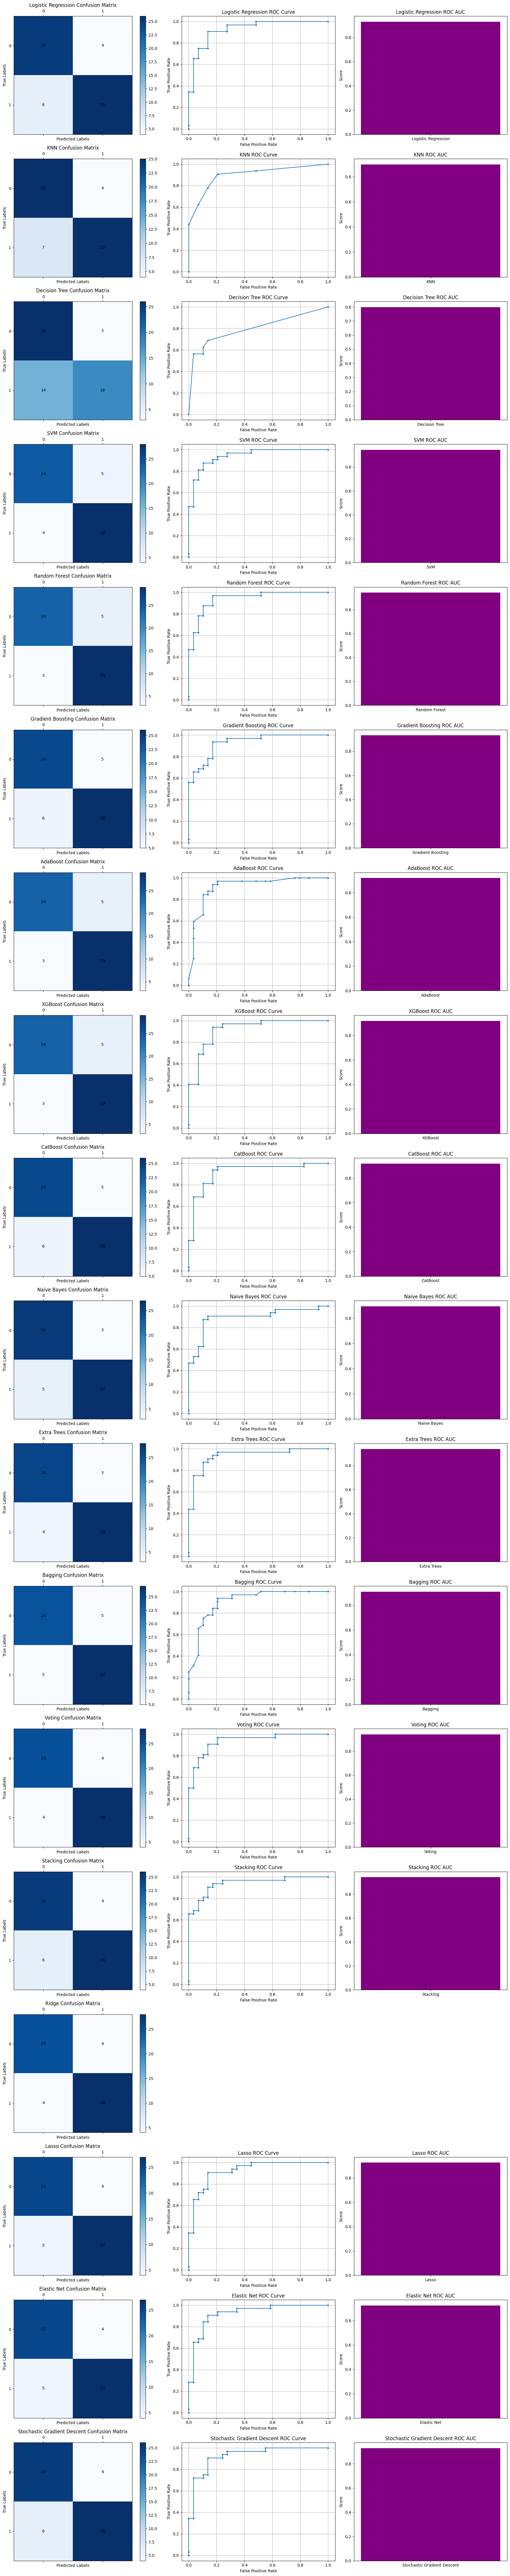

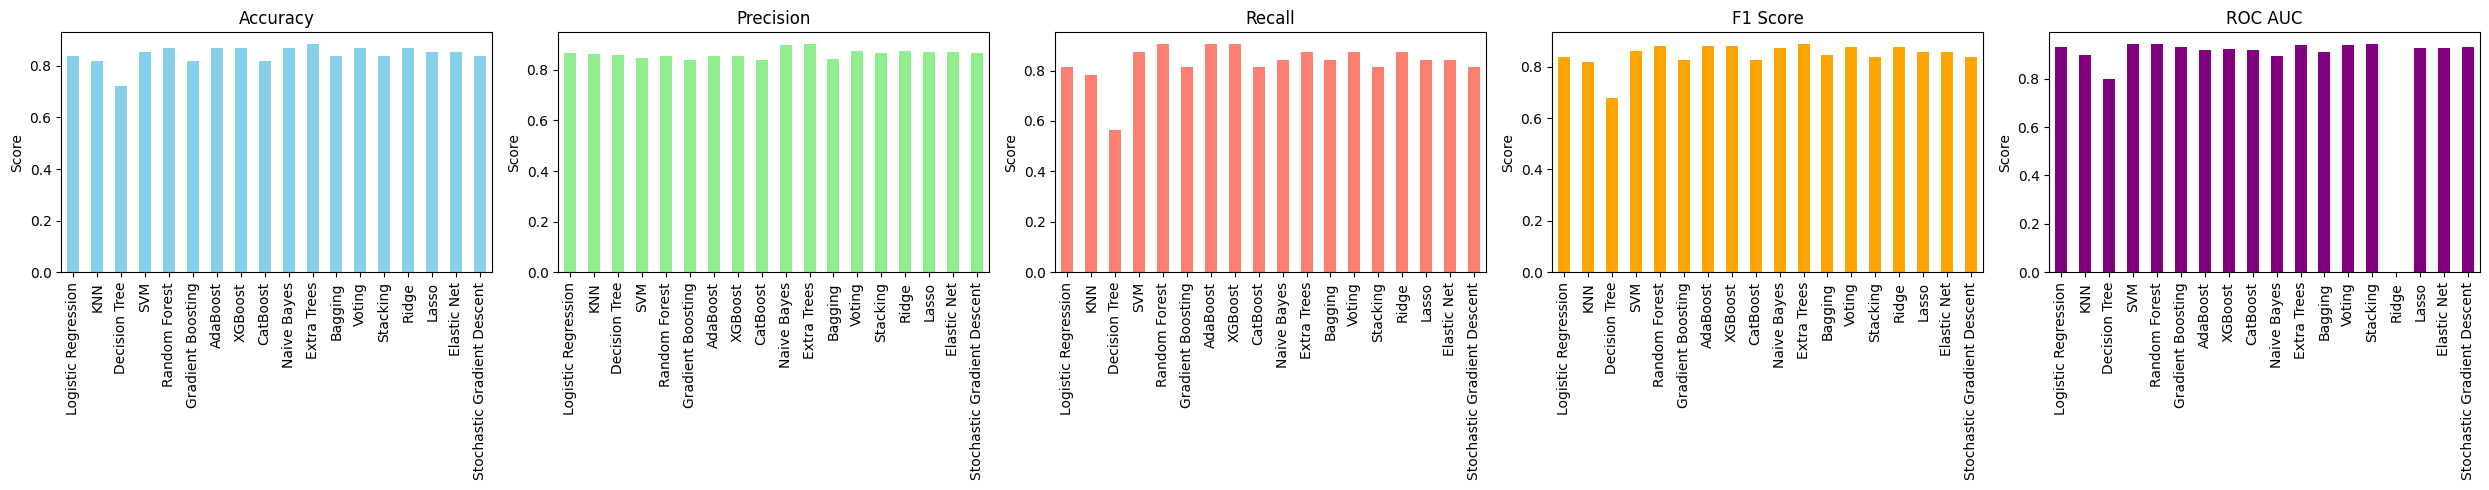

In [61]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier

# Define a function to evaluate and plot metrics
def evaluate_and_plot(model, X_test, y_test, model_name, axs, start_idx):
    try:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')

        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            axs[start_idx+1].plot(fpr, tpr, marker='.')
            axs[start_idx+1].set_title(f'{model_name} ROC Curve')
            axs[start_idx+1].set_xlabel('False Positive Rate')
            axs[start_idx+1].set_ylabel('True Positive Rate')
            axs[start_idx+1].grid()
            axs[start_idx+2].bar(model_name, roc_auc, color='purple')
            axs[start_idx+2].set_title(f'{model_name} ROC AUC')
            axs[start_idx+2].set_ylabel('Score')
        else:
            roc_auc = np.nan
            axs[start_idx+1].axis('off')
            axs[start_idx+2].axis('off')

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, model_name, axs[start_idx])

    except Exception as e:
        print(f'Error evaluating {model_name}: {e}')
        accuracy, precision, recall, f1, roc_auc = np.nan, np.nan, np.nan, np.nan, np.nan
        axs[start_idx].axis('off')
        axs[start_idx+1].axis('off')
        axs[start_idx+2].axis('off')

    return accuracy, precision, recall, f1, roc_auc

# Plot Confusion Matrix
def plot_confusion_matrix(cm, model_name, ax):
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha='center', va='center', color='black')

# Assuming you have a list of models
models = {
    'Logistic Regression': best_log_reg,
    'KNN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svm,
    'Random Forest': best_forest,
    'Gradient Boosting': best_gbm,
    'AdaBoost': best_adaboost,
    'XGBoost': best_xgboost,
    'CatBoost': best_catboost,
    'Naive Bayes': best_naive_bayes,
    'Extra Trees': best_extra_trees,
    'Bagging': best_bagging,
    'Voting': VotingClassifier(estimators=[('lr', best_log_reg), ('rf', best_forest)], voting='soft'),
    'Stacking': best_stacking,
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    'Elastic Net': best_elastic_net,
    'Stochastic Gradient Descent': best_sgd
}

# Create subplots
n_models = len(models)
n_rows = (n_models * 3 + 2) // 3  # Number of rows needed to fit all models
fig, axs = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
axs = axs.flatten()

# Evaluate each model and plot metrics
metrics = {}
for i, (model_name, model) in enumerate(models.items()):
    print(f'Evaluating {model_name}...')
    accuracy, precision, recall, f1, roc_auc = evaluate_and_plot(model, X_test, y_test, model_name, axs, i*3)
    metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Hide any unused subplots
for j in range(i*3 + 3, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# Plot Bar Plots for Metrics
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
metrics_df = pd.DataFrame(metrics).T

# Plot Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Score')

# Plot Precision
metrics_df['Precision'].plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Precision')
axs[1].set_ylabel('Score')

# Plot Recall
metrics_df['Recall'].plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Recall')
axs[2].set_ylabel('Score')

# Plot F1 Score
metrics_df['F1 Score'].plot(kind='bar', ax=axs[3], color='orange')
axs[3].set_title('F1 Score')
axs[3].set_ylabel('Score')

# Plot ROC AUC
metrics_df['ROC AUC'].plot(kind='bar', ax=axs[4], color='purple')
axs[4].set_title('ROC AUC')
axs[4].set_ylabel('Score')

plt.tight_layout()
plt.show()


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Decision Tree...
Evaluating SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating Naive Bayes...
Evaluating Extra Trees...
Evaluating Bagging...
Evaluating Voting...
Evaluating Stacking...
Evaluating Ridge...
Evaluating Lasso...
Evaluating Elastic Net...
Evaluating Stochastic Gradient Descent...


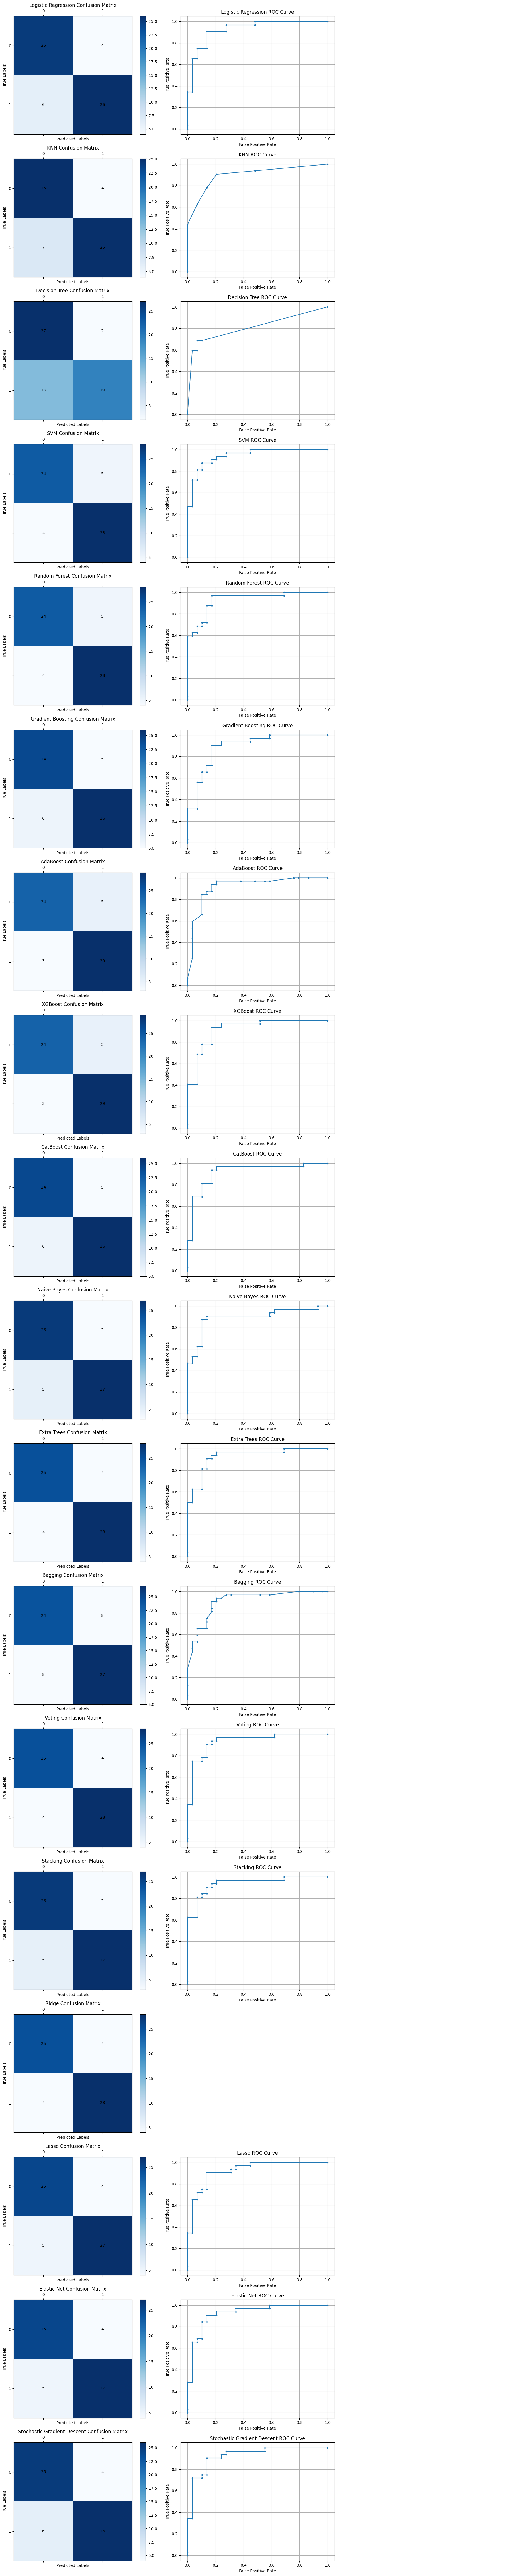

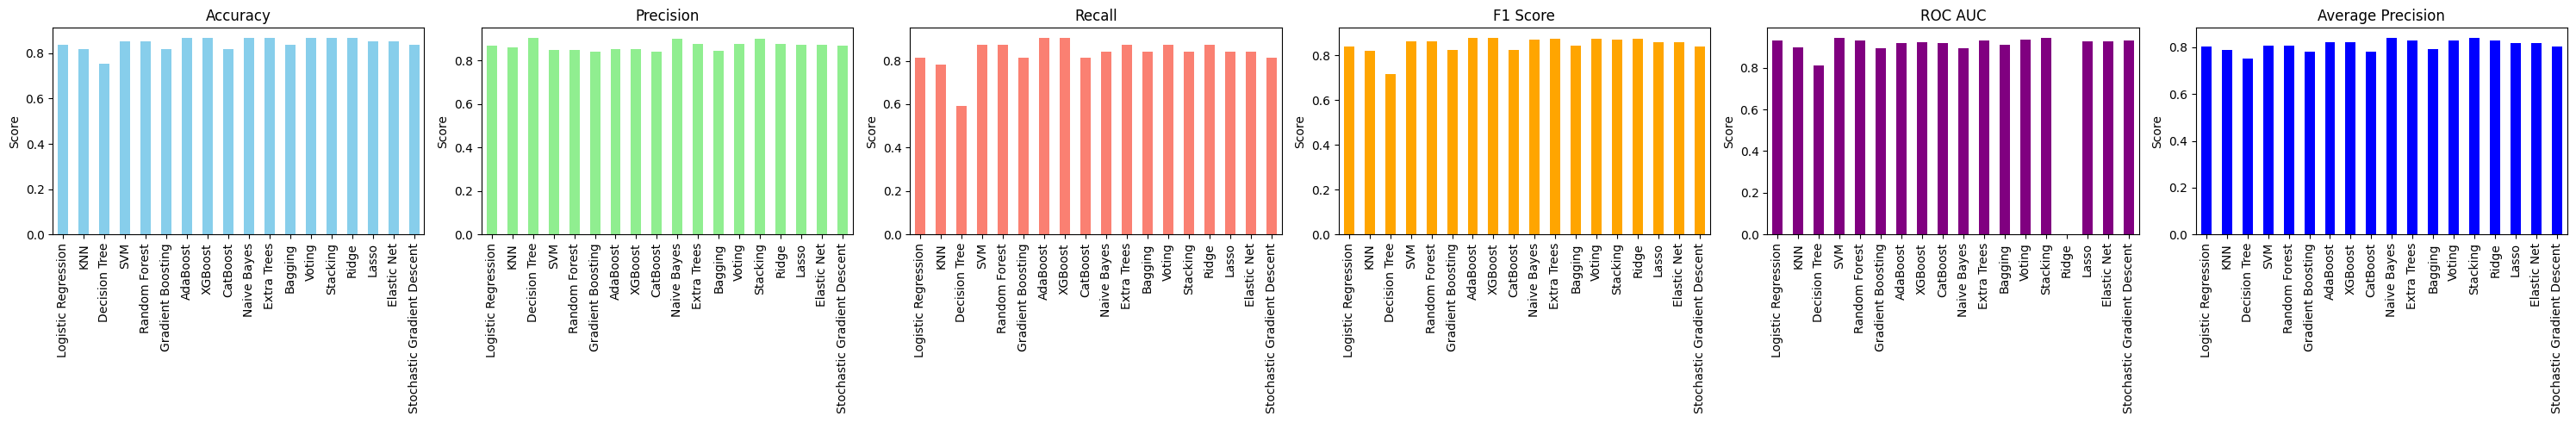

In [64]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score, average_precision_score
from sklearn.ensemble import VotingClassifier

# Define a function to evaluate and plot metrics
def evaluate_and_plot(model, X_test, y_test, model_name, axs, start_idx):
    try:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')
        avg_precision = average_precision_score(y_test, y_pred)

        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)
            axs[start_idx+1].plot(fpr, tpr, marker='.')
            axs[start_idx+1].set_title(f'{model_name} ROC Curve')
            axs[start_idx+1].set_xlabel('False Positive Rate')
            axs[start_idx+1].set_ylabel('True Positive Rate')
            axs[start_idx+1].grid()
            axs[start_idx+2].axis('off')  # Remove ROC AUC bar plot
        else:
            roc_auc = np.nan
            axs[start_idx+1].axis('off')
            axs[start_idx+2].axis('off')

        # Confusion Matrix
        cm = confusion_matrix(y_test, y_pred)
        plot_confusion_matrix(cm, model_name, axs[start_idx])

    except Exception as e:
        print(f'Error evaluating {model_name}: {e}')
        accuracy, precision, recall, f1, roc_auc, avg_precision = np.nan, np.nan, np.nan, np.nan, np.nan, np.nan
        axs[start_idx].axis('off')
        axs[start_idx+1].axis('off')
        axs[start_idx+2].axis('off')

    return accuracy, precision, recall, f1, roc_auc, avg_precision

# Plot Confusion Matrix
def plot_confusion_matrix(cm, model_name, ax):
    cax = ax.matshow(cm, cmap='Blues')
    plt.colorbar(cax)
    ax.set_title(f'{model_name} Confusion Matrix')
    ax.set_xlabel('Predicted Labels')
    ax.set_ylabel('True Labels')
    for (i, j), val in np.ndenumerate(cm):
        ax.text(j, i, val, ha='center', va='center', color='black')

# Assuming you have a list of models
models = {
    'Logistic Regression': best_log_reg,
    'KNN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svm,
    'Random Forest': best_forest,
    'Gradient Boosting': best_gbm,
    'AdaBoost': best_adaboost,
    'XGBoost': best_xgboost,
    'CatBoost': best_catboost,
    'Naive Bayes': best_naive_bayes,
    'Extra Trees': best_extra_trees,
    'Bagging': best_bagging,
    'Voting': VotingClassifier(estimators=[('lr', best_log_reg), ('rf', best_forest)], voting='soft'),
    'Stacking': best_stacking,
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    'Elastic Net': best_elastic_net,
    'Stochastic Gradient Descent': best_sgd
}

# Create subplots
n_models = len(models)
n_rows = (n_models * 3 + 2) // 3  # Number of rows needed to fit all models
fig, axs = plt.subplots(n_rows, 3, figsize=(18, n_rows * 5))
axs = axs.flatten()

# Evaluate each model and plot metrics
metrics = {}
for i, (model_name, model) in enumerate(models.items()):
    print(f'Evaluating {model_name}...')
    accuracy, precision, recall, f1, roc_auc, avg_precision = evaluate_and_plot(model, X_test, y_test, model_name, axs, i*3)
    metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc, 'Average Precision': avg_precision}

# Hide any unused subplots
for j in range(i*3 + 3, len(axs)):
    axs[j].axis('off')

plt.tight_layout()
plt.show()

# Plot Bar Plots for Metrics
fig, axs = plt.subplots(1, 6, figsize=(30, 5))
metrics_df = pd.DataFrame(metrics).T

# Plot Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Score')

# Plot Precision
metrics_df['Precision'].plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Precision')
axs[1].set_ylabel('Score')

# Plot Recall
metrics_df['Recall'].plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Recall')
axs[2].set_ylabel('Score')

# Plot F1 Score
metrics_df['F1 Score'].plot(kind='bar', ax=axs[3], color='orange')
axs[3].set_title('F1 Score')
axs[3].set_ylabel('Score')

# Plot ROC AUC
metrics_df['ROC AUC'].plot(kind='bar', ax=axs[4], color='purple')
axs[4].set_title('ROC AUC')
axs[4].set_ylabel('Score')

# Plot Average Precision
metrics_df['Average Precision'].plot(kind='bar', ax=axs[5], color='blue')
axs[5].set_title('Average Precision')
axs[5].set_ylabel('Score')

plt.tight_layout()
plt.show()


Evaluating Logistic Regression...
Evaluating KNN...
Evaluating Decision Tree...
Evaluating SVM...
Evaluating Random Forest...
Evaluating Gradient Boosting...
Evaluating AdaBoost...
Evaluating XGBoost...
Evaluating CatBoost...
Evaluating Naive Bayes...
Evaluating Extra Trees...
Evaluating Bagging...
Evaluating Voting...
Evaluating Stacking...
Evaluating Ridge...
Evaluating Lasso...
Evaluating Elastic Net...
Evaluating Stochastic Gradient Descent...


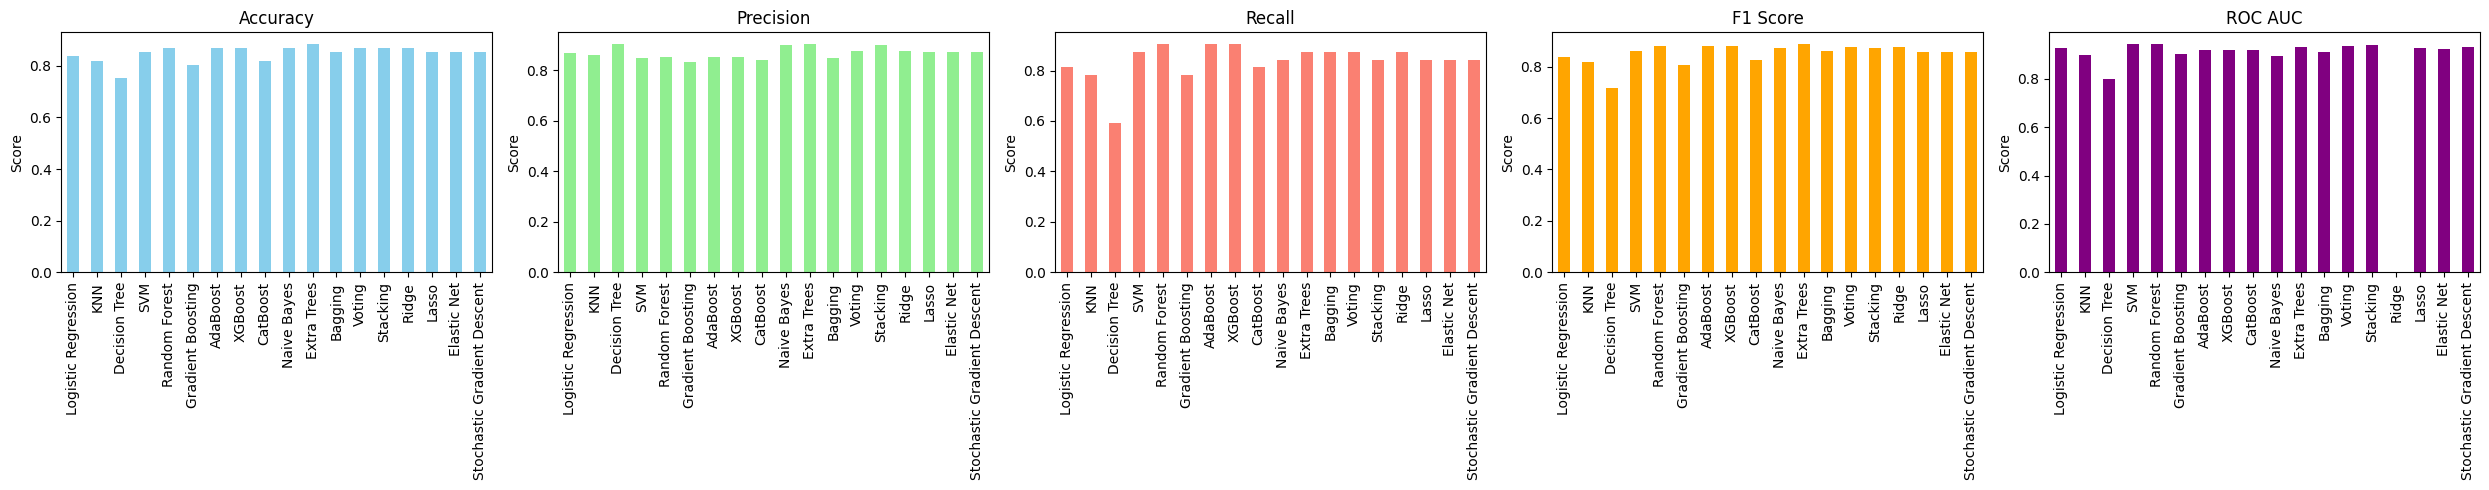

In [67]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix, roc_curve, roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.ensemble import VotingClassifier
import os

# Create a directory to save the plots
output_dir = 'model_evaluation'
os.makedirs(output_dir, exist_ok=True)

# Define a function to evaluate and plot metrics
def evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name):
    try:
        # Fit the model on the training data
        model.fit(X_train, y_train)

        # Predict on the test data
        y_pred = model.predict(X_test)

        # Calculate metrics
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred, average='binary')
        recall = recall_score(y_test, y_pred, average='binary')
        f1 = f1_score(y_test, y_pred, average='binary')

        if hasattr(model, 'predict_proba'):
            y_prob = model.predict_proba(X_test)[:, 1]
            roc_auc = roc_auc_score(y_test, y_prob)
            fpr, tpr, _ = roc_curve(y_test, y_prob)

            # Create a figure for the plots
            fig, axs = plt.subplots(1, 3, figsize=(18, 6))

            # Plot ROC Curve
            axs[0].plot(fpr, tpr, marker='.')
            axs[0].set_title(f'{model_name} ROC Curve')
            axs[0].set_xlabel('False Positive Rate')
            axs[0].set_ylabel('True Positive Rate')
            axs[0].grid()
            axs[0].text(0.6, 0.2, f'ROC AUC: {roc_auc:.2f}', fontsize=12, color='purple')

            # Plot ROC AUC Bar
            axs[1].bar(model_name, roc_auc, color='purple')
            axs[1].set_title(f'{model_name} ROC AUC')
            axs[1].set_ylabel('Score')
            axs[1].set_ylim(0, 1)

            # Confusion Matrix
            cm = confusion_matrix(y_test, y_pred)
            cax = axs[2].matshow(cm, cmap='Blues')
            plt.colorbar(cax, ax=axs[2])
            axs[2].set_title(f'{model_name} Confusion Matrix')
            axs[2].set_xlabel('Predicted Labels')
            axs[2].set_ylabel('True Labels')
            for (i, j), val in np.ndenumerate(cm):
                axs[2].text(j, i, val, ha='center', va='center', color='black')

            plt.tight_layout()
            plt.savefig(os.path.join(output_dir, f'{model_name}_combined.png'))
            plt.close()

        else:
            roc_auc = np.nan

    except Exception as e:
        print(f'Error evaluating {model_name}: {e}')
        accuracy, precision, recall, f1, roc_auc = np.nan, np.nan, np.nan, np.nan, np.nan
        # Save empty plots if needed
        fig, axs = plt.subplots(1, 3, figsize=(18, 6))
        axs[0].text(0.5, 0.5, 'Error Plotting ROC Curve', ha='center', va='center', fontsize=20, color='red')
        axs[0].axis('off')
        axs[1].axis('off')
        axs[2].axis('off')
        plt.savefig(os.path.join(output_dir, f'{model_name}_error.png'))
        plt.close()

    return accuracy, precision, recall, f1, roc_auc

# Assuming you have a list of models
models = {
    'Logistic Regression': best_log_reg,
    'KNN': best_knn,
    'Decision Tree': best_tree,
    'SVM': best_svm,
    'Random Forest': best_forest,
    'Gradient Boosting': best_gbm,
    'AdaBoost': best_adaboost,
    'XGBoost': best_xgboost,
    'CatBoost': best_catboost,
    'Naive Bayes': best_naive_bayes,
    'Extra Trees': best_extra_trees,
    'Bagging': best_bagging,
    'Voting': VotingClassifier(estimators=[('lr', best_log_reg), ('rf', best_forest)], voting='soft'),
    'Stacking': best_stacking,
    'Ridge': best_ridge,
    'Lasso': best_lasso,
    'Elastic Net': best_elastic_net,
    'Stochastic Gradient Descent': best_sgd
}

# Evaluate each model and plot metrics
metrics = {}
for model_name, model in models.items():
    print(f'Evaluating {model_name}...')
    accuracy, precision, recall, f1, roc_auc = evaluate_and_plot(model, X_train, y_train, X_test, y_test, model_name)
    metrics[model_name] = {'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1 Score': f1, 'ROC AUC': roc_auc}

# Plot Bar Plots for Metrics
fig, axs = plt.subplots(1, 5, figsize=(25, 5))
metrics_df = pd.DataFrame(metrics).T

# Plot Accuracy
metrics_df['Accuracy'].plot(kind='bar', ax=axs[0], color='skyblue')
axs[0].set_title('Accuracy')
axs[0].set_ylabel('Score')

# Plot Precision
metrics_df['Precision'].plot(kind='bar', ax=axs[1], color='lightgreen')
axs[1].set_title('Precision')
axs[1].set_ylabel('Score')

# Plot Recall
metrics_df['Recall'].plot(kind='bar', ax=axs[2], color='salmon')
axs[2].set_title('Recall')
axs[2].set_ylabel('Score')

# Plot F1 Score
metrics_df['F1 Score'].plot(kind='bar', ax=axs[3], color='orange')
axs[3].set_title('F1 Score')
axs[3].set_ylabel('Score')

# Plot ROC AUC
metrics_df['ROC AUC'].plot(kind='bar', ax=axs[4], color='purple')
axs[4].set_title('ROC AUC')
axs[4].set_ylabel('Score')

plt.tight_layout()
plt.show()


#Tabluated Metrics

In [44]:
!pip install tabulate

In [63]:
import pandas as pd
from tabulate import tabulate

# Create a DataFrame to store metrics
metrics_df = pd.DataFrame(metrics).T

# Display the metrics DataFrame
print("Metrics for All Models:")
print(metrics_df)

# Ranking models based on each metric
ranking_df = metrics_df.copy()
ranking_df['Rank (Accuracy)'] = ranking_df['Accuracy'].rank(ascending=False)
ranking_df['Rank (Precision)'] = ranking_df['Precision'].rank(ascending=False)
ranking_df['Rank (Recall)'] = ranking_df['Recall'].rank(ascending=False)
ranking_df['Rank (F1 Score)'] = ranking_df['F1 Score'].rank(ascending=False)
ranking_df['Rank (ROC AUC)'] = ranking_df['ROC AUC'].rank(ascending=False)

# Sort by overall ranking based on ROC AUC (or any other metric of interest)
ranking_df['Overall Rank'] = ranking_df['Rank (ROC AUC)']  # Change to 'Rank (Accuracy)' or others if needed
ranking_df = ranking_df.sort_values(by='Overall Rank')

# Display the ranking table using tabulate
print("\nRanking of Models:")
print(tabulate(ranking_df[['Accuracy', 'Precision', 'Recall', 'F1 Score', 'ROC AUC', 'Overall Rank']], headers='keys', tablefmt='pretty'))


Metrics for All Models:
                             Accuracy  Precision   Recall  F1 Score   ROC AUC
Logistic Regression          0.836066   0.866667  0.81250  0.838710  0.928879
KNN                          0.819672   0.862069  0.78125  0.819672  0.898707
Decision Tree                0.721311   0.857143  0.56250  0.679245  0.798491
SVM                          0.852459   0.848485  0.87500  0.861538  0.943966
Random Forest                0.868852   0.852941  0.90625  0.878788  0.941810
Gradient Boosting            0.819672   0.838710  0.81250  0.825397  0.931034
AdaBoost                     0.868852   0.852941  0.90625  0.878788  0.918642
XGBoost                      0.868852   0.852941  0.90625  0.878788  0.920259
CatBoost                     0.819672   0.838710  0.81250  0.825397  0.919181
Naive Bayes                  0.868852   0.900000  0.84375  0.870968  0.894397
Extra Trees                  0.885246   0.903226  0.87500  0.888889  0.937500
Bagging                      0.836066   

In [68]:
import shutil

# Define the folder you want to zip and the output zip file path
folder_to_zip = '/content/model_evaluation'
zip_file_path = '/content/model_evaluation.zip'

# Create a zip file from the folder
shutil.make_archive(zip_file_path.replace('.zip', ''), 'zip', folder_to_zip)


'/content/model_evaluation.zip'

In [69]:
from google.colab import files

# Download the zip file
files.download(zip_file_path)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>